<a href="https://colab.research.google.com/github/Mershyxrvs/Artificial-Intelligence/blob/main/CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
Number of unique classes: 100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
1250/1250 - 9s - 7ms/step - accuracy: 0.1059 - loss: 3.8931 - val_accuracy: 0.1769 - val_loss: 3.4468
Epoch 2/500
1250/1250 - 5s - 4ms/step - accuracy: 0.2267 - loss: 3.2042 - val_accuracy: 0.2324 - val_loss: 3.1745
Epoch 3/500
1250/1250 - 4s - 3ms/step - accuracy: 0.2790 - loss: 2.9309 - val_accuracy: 0.2538 - val_loss: 3.0604
Epoch 4/500
1250/1250 - 5s - 4ms/step - accuracy: 0.3083 - loss: 2.7676 - val_accuracy: 0.2709 - val_loss: 3.0074
Epoch 5/500
1250/1250 - 4s - 4ms/step - accuracy: 0.3370 - loss: 2.6391 - val_accuracy: 0.2797 - val_loss: 2.9672
Epoch 6/500
1250/1250 - 4s - 3ms/step - accuracy: 0.3569 - loss: 2.5345 - val_accuracy: 0.2826 - val_loss: 2.9619
Epoch 7/500
1250/1250 - 5s - 4ms/step - accuracy: 0.3755 - loss: 2.4311 - val_accuracy: 0.2928 - val_loss: 2.9344
Epoch 8/500
1250/1250 - 4s - 3ms/step - accuracy: 0.3936 - loss: 2.3373 - val_accuracy: 0.2962 - val_loss: 2.9282
Epoch 9/500
1250/1250 - 4s - 3ms/step - accuracy: 0.4160 - loss: 2.2461 - val_accuracy: 

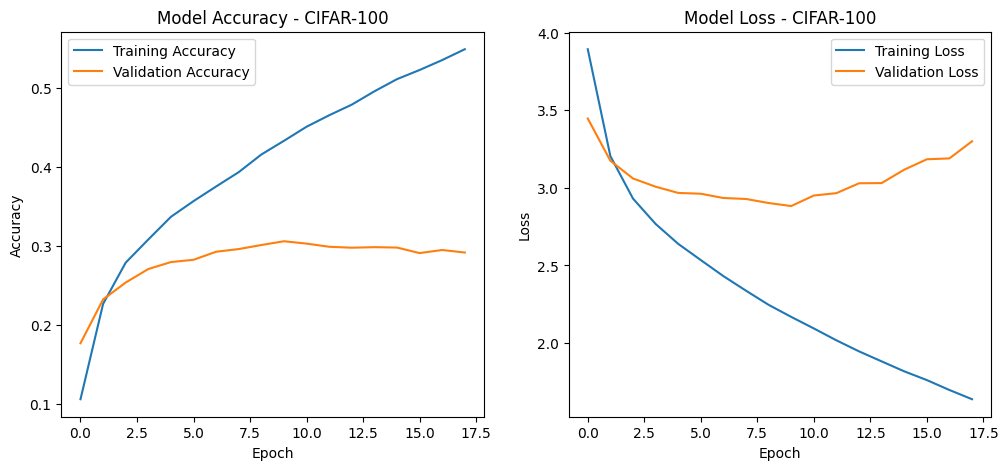

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

# 2. **CRITICAL FIX: DATA PREPROCESSING (NORMALIZATION)**
# Scale the pixel values from [0, 255] to [0.0, 1.0]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Optional: Check the number of classes (should be 100)
print(f"Number of unique classes: {len(np.unique(y_train))}")

# 3. Define the Simple CNN architecture
model = Sequential()
# Feature extraction layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Classification layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Output layer with 100 units for 100 classes
model.add(Dense(100, activation='softmax'))

# 4. Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. Define Callbacks
callbacks = [
    # Stops training if validation loss doesn't improve for 8 epochs
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    # Saves the model with the lowest validation loss
    ModelCheckpoint('best_model_cifar100.keras', monitor='val_loss', mode='min', save_best_only=True)
]

# 6. Train the model
# Reduced epochs from 30000 to a reasonable number (e.g., 500) since EarlyStopping is used.
history = model.fit(
    x_train,
    y_train,
    validation_split=0.20,
    batch_size=32,
    epochs=500, # Max epochs, but EarlyStopping will usually stop it sooner
    callbacks=callbacks,
    verbose=2 # Show less output per epoch
)

# 7. Evaluate the model on the test set
print("\nEvaluating the model on the test data...")
model.evaluate(x_test, y_test)

# 8. Plot training history
# Plotting Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy - CIFAR-100')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss - CIFAR-100')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()